In [27]:
import mss
import mss.tools

import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import time
import pyautogui
import math
# import keyboard
# import sys

In [3]:
with mss.mss() as sct:
    monitor = sct.monitors[1]

    screenshotArea = {
        "top": int(monitor["top"] + (monitor["height"] - monitor["height"] * 0.5) / 2),
        "left": int(monitor["left"] + (monitor["width"] - monitor["width"] * 0.5) / 2),
        "height": int(monitor["height"] * 0.5),
        "width": int(monitor["width"] * 0.5)
    }

In [6]:
def getImage(area=screenshotArea):
    screenshot = sct.grab(area)
    image = Image.frombytes('RGB', screenshot.size,
                            screenshot.bgra, 'raw', 'BGRX')
    return np.array(image)

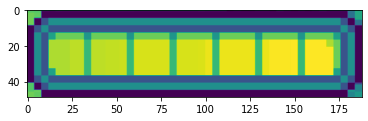

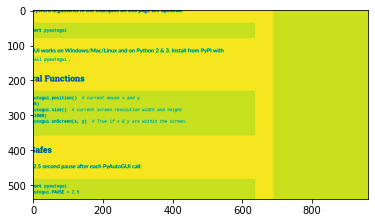

In [7]:
pyautogui.mouseDown(button='left')
cast_bar_template = cv.imread('castBarTemplate.png',0)
screen_image = cv.cvtColor(getImage(), cv.COLOR_BGR2GRAY)

plt.imshow(cast_bar_template)
plt.show()
plt.imshow(screen_image)
plt.show()


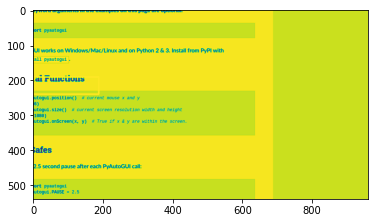

In [8]:
result = cv.matchTemplate(screen_image, cast_bar_template, cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

w, h = cast_bar_template.shape[::-1]
top_left = max_loc
bottom_right  = (top_left[0] + w, top_left[1] + h)
cv.rectangle(screen_image, top_left, bottom_right, 255, 3)

plt.imshow(screen_image)
plt.show()

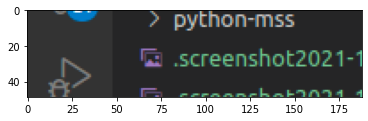

In [29]:
cast_bar_area = {
    "top": int(max_loc[1]),
    "left": int(max_loc[0]),
    "height": int(h),
    "width": int(w)
}

cast_bar_image = getImage(cast_bar_area)
plt.imshow(cast_bar_image)
plt.show()
# pyautogui.mouseUp(button='left')


In [32]:
def bar_percentage(cast_bar_image):
    shape = cast_bar_image.shape
    middleIndex = math.floor(shape[0] / 2)
    for y in range(shape[1]):
        # if (item(middleIndex, y, 0) < )
        print(cast_bar_image.item(middleIndex, y, 0))
        print(cast_bar_image.item(middleIndex, y, 1))
        print(cast_bar_image.item(middleIndex, y, 2))
    # print(shape)

bar_percentage(cast_bar_image)

51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
32
44
101
127
115
165
96
47
47
60
66
111
89
73
111
89
73
111
89
73
111
89
73
111
89
73
111
89
73
111
89
73
111
89
73
111
87
56
52
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37
38
37
37


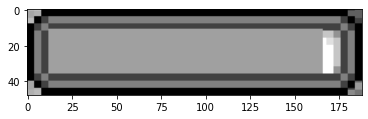

In [17]:
full_cast_bar = cv.imread('castBarFullTemplate.png', cv.IMREAD_GRAYSCALE)
plt.imshow(full_cast_bar, 'gray')
plt.show()

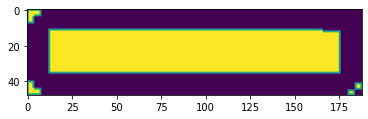

In [23]:
ret, thresh = cv.threshold(full_cast_bar, 140, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(thresh, contours, -1, (150, 255, 0), 1)
plt.imshow(thresh)
plt.show()